In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, f as fdist, binomtest
import math

# Load dataset
weather = pd.read_csv('../dataset/weather.csv')

In [9]:
# Soal General 1: Descriptive Statistics 

print("Descriptive Statistics\n")

# iterate each column from weather
columns = weather.columns
for i in range(1, len(columns)):
    
    column = columns[i]
    data = weather[column]
    
    print(f"\033[32mColumn-{i} [{column}]\033[0m")
    if (pd.api.types.is_numeric_dtype(weather[column])): 
    
        print(f"Mean               : {data.mean():.3f}")
        print(f"Median             : {data.median():.3f}")
        print(f"Mode               : {data.mode()[0]:.3f}")
        print(f"Standard Deviation : {data.std():.3f}")
        print(f"Variance           : {data.var():.3f}")
        print(f"Minimum            : {data.min():.3f}")
        print(f"Maximum            : {data.max():.3f}")
        print(f"Kuartil 1          : {data.quantile(0.25):.3f}")
        print(f"Kuartil 2          : {data.quantile(0.50):.3f}")
        print(f"Kuartil 3          : {data.quantile(0.75):.3f}")
        print(f"IQR                : {(data.quantile(0.75) - data.quantile(0.25)):.3f}")
        print(f"Skewness           : {data.skew():.3f}")
        print(f"Kurtosis           : {data.kurt():.3f}\n")
        
    else:
        unique = data.unique()
        print("No | Value      | Count      | Proportion")
        print("---|------------|------------|-----------")
        for i, val in enumerate(unique):
            print(f"{i+1}. | {val: <10} | {data[data == val].count(): <10} | {data[data == val].count() / len(data) * 100:.3f} %")
        
        print()
        



Descriptive Statistics

Column-1 [Temperature]
Mean               : 24.940
Median             : 24.937
Mode               : 15.441
Standard Deviation : 3.003
Variance           : 9.020
Minimum            : 15.441
Maximum            : 35.060
Kuartil 1          : 22.919
Kuartil 2          : 24.937
Kuartil 3          : 26.986
IQR                : 4.067
Skewness           : 0.029
Kurtosis           : -0.095

Column-2 [Humidity]
Mean               : 70.110
Median             : 69.872
Mode               : 40.991
Standard Deviation : 9.808
Variance           : 96.192
Minimum            : 40.991
Maximum            : 104.673
Kuartil 1          : 63.314
Kuartil 2          : 69.872
Kuartil 3          : 76.744
IQR                : 13.431
Skewness           : 0.029
Kurtosis           : -0.089

Column-3 [Precipitation]
Mean               : 9.923
Median             : 9.909
Mode               : -9.481
Standard Deviation : 5.032
Variance           : 25.318
Minimum            : -9.481
Maximum           

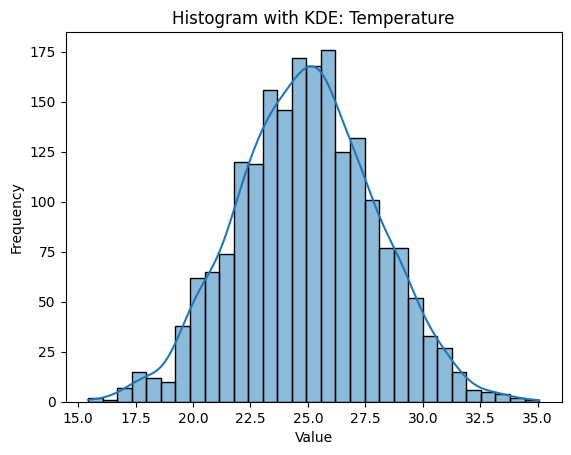

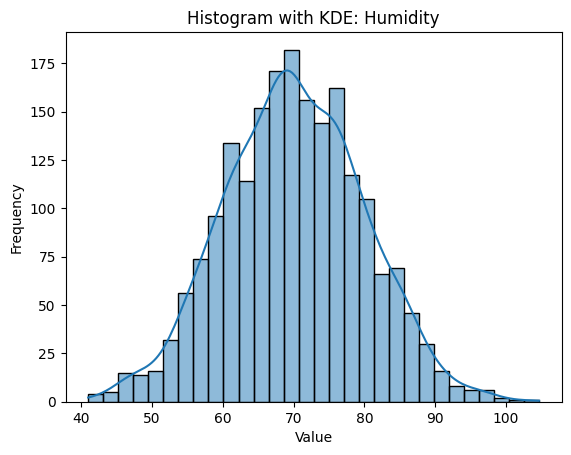

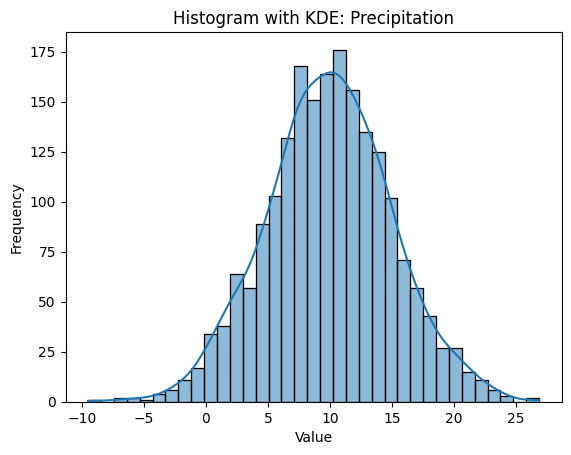

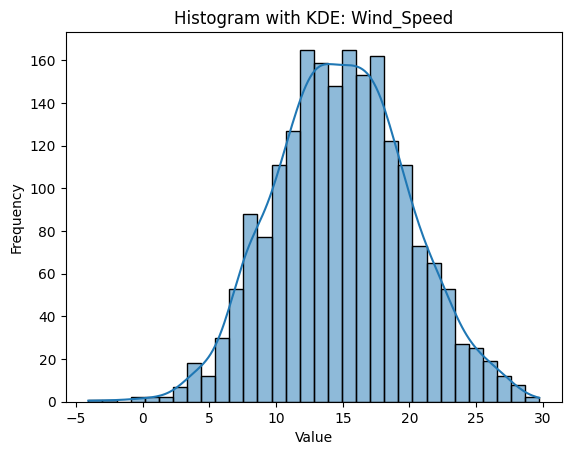

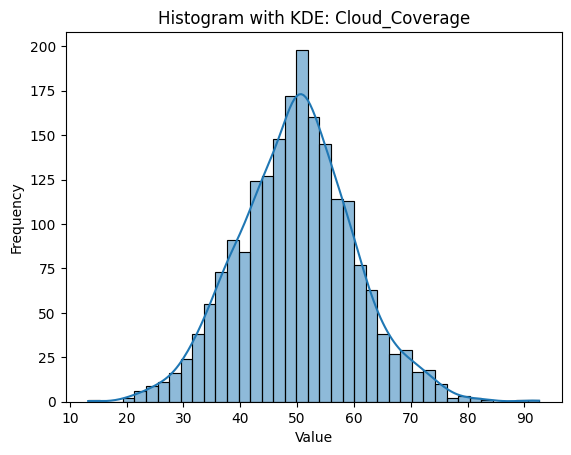

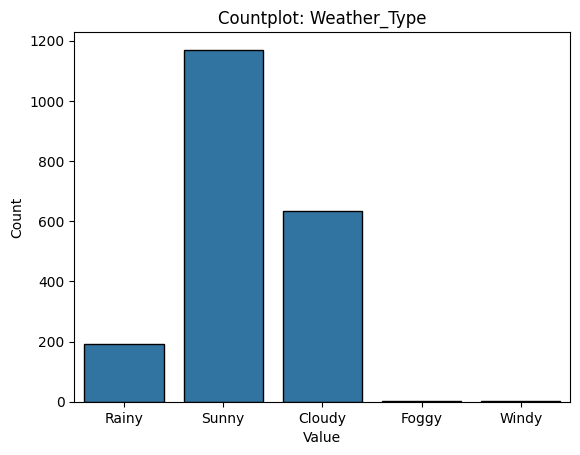

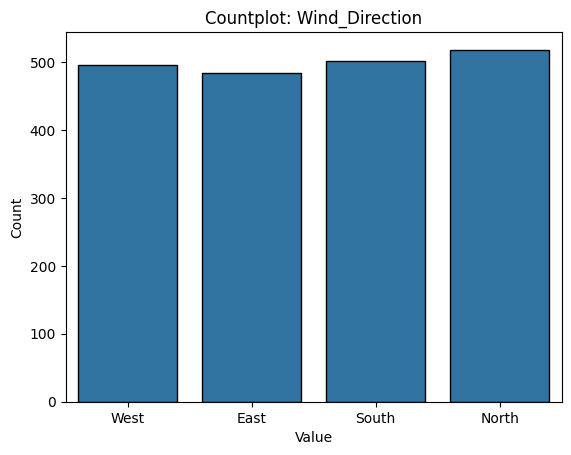

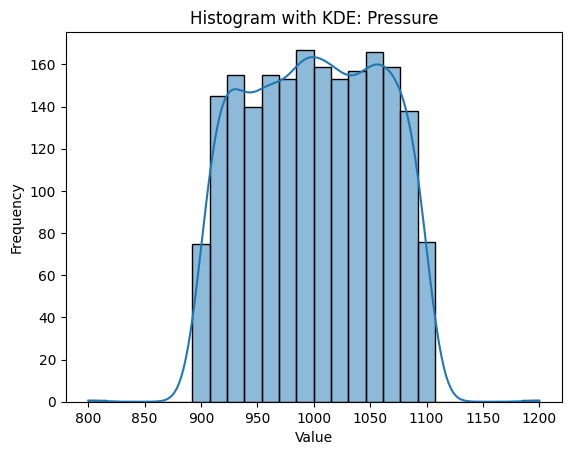

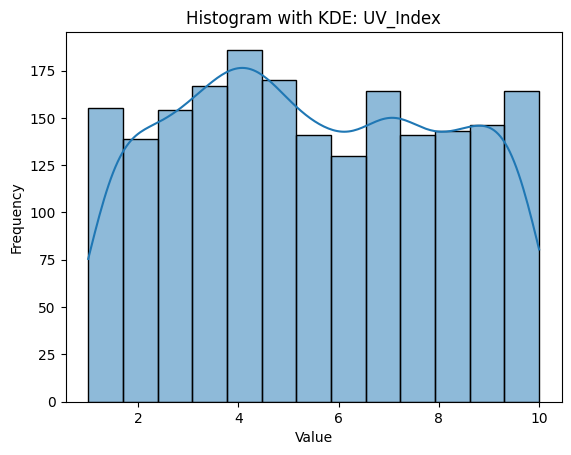

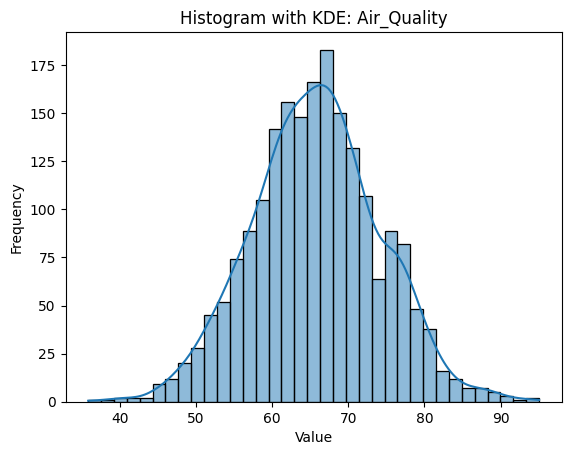

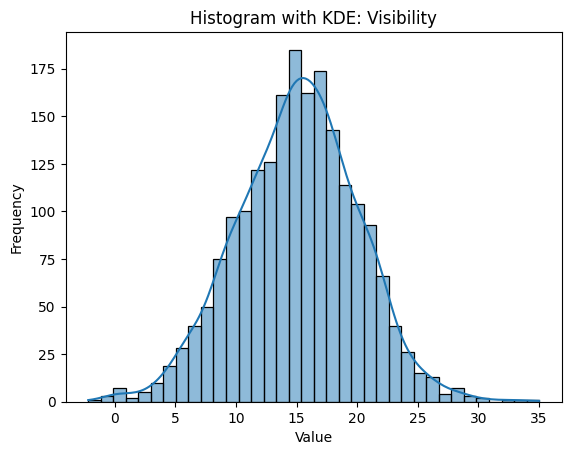

In [14]:

# Get the list of columns
columns = weather.columns

# Loop through the columns (skip the first column if it is not numerical)
for column in columns[1:]:
    if pd.api.types.is_numeric_dtype(weather[column]):
        # Create a new figure
        plt.figure()
        
        # Plot histogram with KDE
        sns.histplot(weather[column], kde=True, edgecolor='black')
        
        # Add titles and labels
        plt.title(f'Histogram with KDE: {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        
        # Show the plot
        plt.show()
    else:
        # Create a new figure
        plt.figure()
        
        # Plot countplot
        sns.countplot(data=weather, x=column, edgecolor='black')
        
        # Add titles and labels
        plt.title(f'Countplot: {column}')
        plt.xlabel('Value')
        plt.ylabel('Count')
        
        # Show the plot
        plt.show()

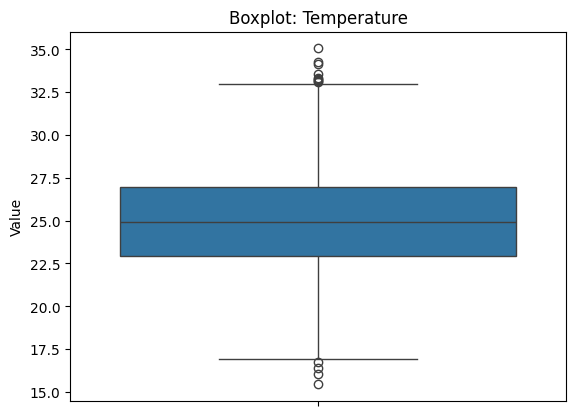

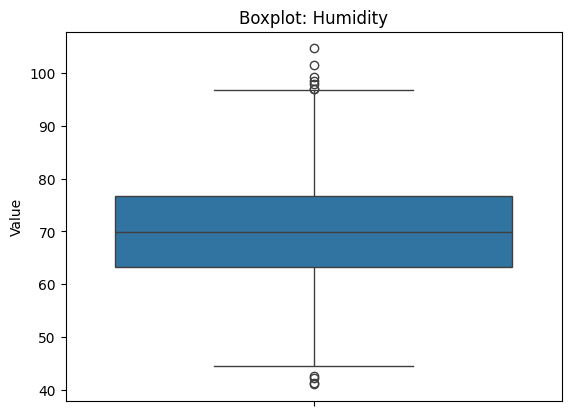

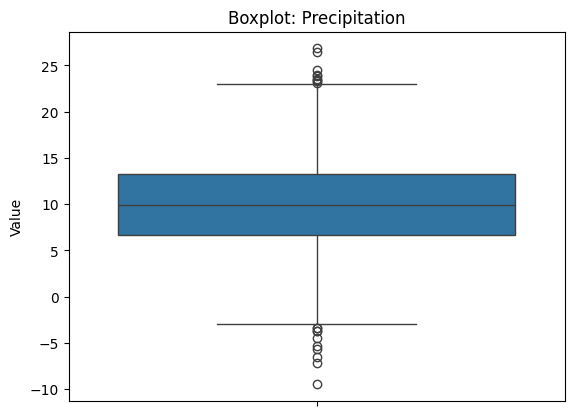

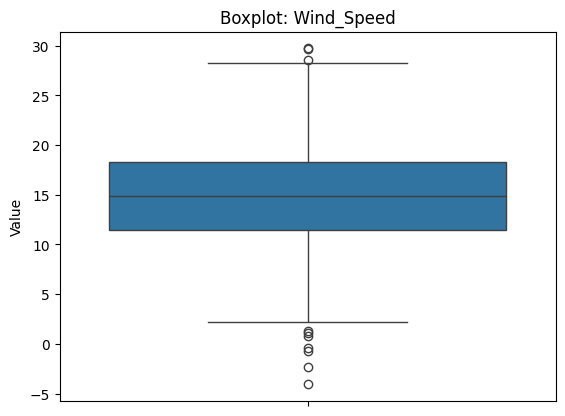

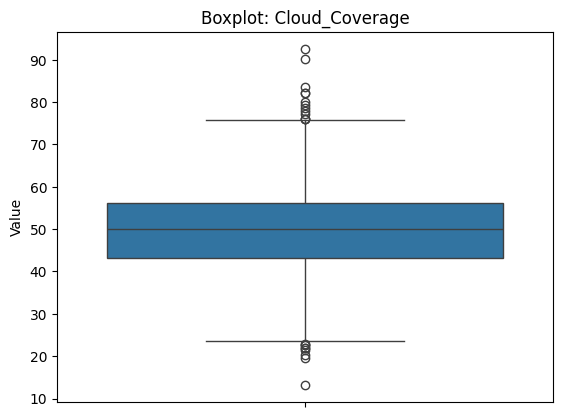

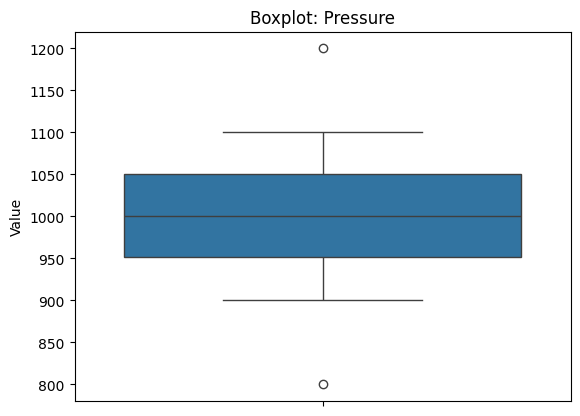

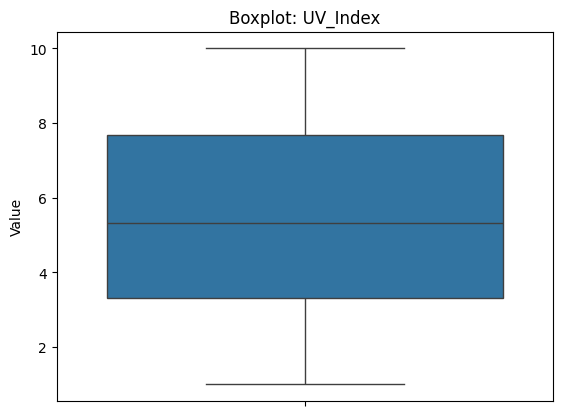

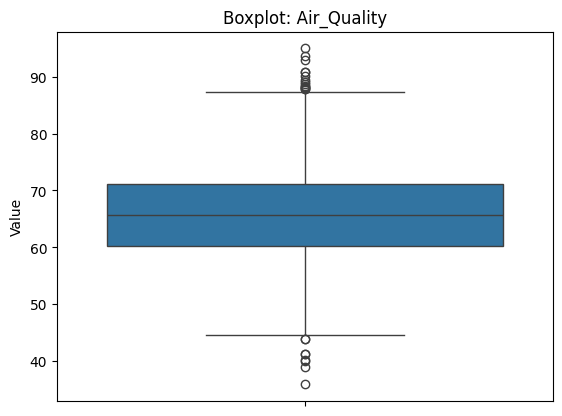

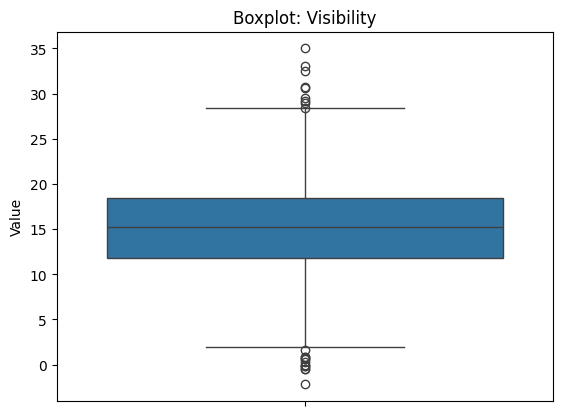

In [15]:
# Boxplot for numerical columns

# Loop through the columns (skip the first column if it is not numerical)
for column in columns[1:]:
    if pd.api.types.is_numeric_dtype(weather[column]):
        # Create a new figure
        plt.figure()
        
        # Plot boxplot
        sns.boxplot(data=weather, y=column)
        
        # Add titles and labels
        plt.title(f'Boxplot: {column}')
        plt.ylabel('Value')
        
        # Show the plot
        plt.show()

### SOAL NO 4

1) Temperature
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Temperature' berdistribusi normal karena
mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

2) Humidity
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Humidity' berdistribusi normal karena
mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

3) Precipitation
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Precipitation' berdistribusi normal karena mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

4) Wind_Speed
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Wind_Speed' berdistribusi normal karena
mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

5) Cloud_Coverage
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Cloud_Coverage' berdistribusi normal karena mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

6) Pressure
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Pressure' tidak berdistribusi normal melainkan berdistribusi uniform karena frekuensi datanya tersebar merata

7) UV_Index
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'UV_Index' tidak berdistribusi normal melainkan berdistribusi uniform karena frekuensi datanya tersebar merata

8) Air_Quality
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Air_Quality' berdistribusi normal karena mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

9) Visibility
Berdsarkan hasil visualisasi data menggunakan histrogram, dapat disimpulkan bahwa data 'Visibility' berdistribusi normal karena mendekati bentuk simetris dan memiliki persebaran data yang terpusat tengah

In [16]:
from scipy.stats import norm

cdf_values = norm.cdf(1.4)
print(cdf_values)

0.9192433407662289


In [32]:
def getZScore(data, hyphothesis):
    
    mean = data.mean()
    std = data.std()
    zscore = (mean - hyphothesis) / (std/ math.sqrt(len(data)))
    
    return zscore



### SOAL NOMOR 5

1.
H0 : X bar = 75
H1 : X bar > 75



In [27]:
# 5.1

Zscore = getZScore(weather['Humidity'], 75)
print(f"Z-Score: {Zscore}")

alpha = 0.05
Zalpha = norm.ppf(1-alpha)
print(Zalpha)

if Zscore > Zalpha:
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")

70.11011336628557
Z-Score: -22.296837843607175
1.6448536269514722
Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak


# 5.2
H0 = 3
H1 != 3

In [33]:
Zscore = getZScore(weather['UV_Index'], 3)
Zalpha = norm.ppf(1-alpha/2)

print(weather['UV_Index'].mean())

if (Zscore < -Zalpha) or (Zscore > Zalpha):
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")

5.464730285222571
Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima


# 5.3

H0 = 950
H1 != 950

In [42]:
pressure_5latest = weather['Pressure'][:5]

print(pressure_5latest)

H0 = 950
alpha = 0.05

print(pressure_5latest.mean())

Zscore = getZScore(pressure_5latest, H0)
print(f"Z-Score: {Zscore}")
Zalpha = norm.ppf(1-alpha/2)
print(Zalpha)

if (Zscore < -Zalpha) or (Zscore > Zalpha):
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")

0    1093.875521
1     965.291716
2     905.728473
3     980.591057
4     913.286310
Name: Pressure, dtype: float64
971.7546154770826
Z-Score: 0.6441556286115692
1.959963984540054
Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak


# 5.4

H0 : p = 0.35
H1 : p != 0.35

In [46]:
countCloud_Covearage_Under60 = weather[weather['Cloud_Coverage'] < 60]['Cloud_Coverage'].count()
countCloud_Covearage_Total = weather['Cloud_Coverage'].count()

sample_proportion = countCloud_Covearage_Under60 / countCloud_Covearage_Total
print(sample_proportion)

p0 = 0.35
z = (sample_proportion - p0) / math.sqrt((p0 *(1-p0)) / countCloud_Covearage_Total)

alpha = 0.05
zalpha = norm.ppf(1-alpha/2)

if (z < -zalpha) or (z > zalpha):
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")

0.8555
Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima


### nomor 6




In [48]:
# 6.1

# data: humidity

Len = len(weather['Humidity'])
HumidityA = weather['Humidity'][:int(Len/2)]
HumidityB = weather['Humidity'][int(Len/2):]

AverageA = HumidityA.mean()
AverageB = HumidityB.mean()


Zscore = ((AverageA - AverageB)-0) / math.sqrt((HumidityA.std()**2 / len(HumidityA)) + (HumidityB.std()**2 / len(HumidityB)))

alpha = 0.05
Zalpha = norm.ppf(1-alpha/2)

if (Zscore < -Zalpha) or (Zscore > Zalpha):
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
    print("Rata-rata Humidity di dua data berbeda")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")
    print("Rata-rata Humidity di dua data sama")
    

Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak
Rata-rata Humidity di dua kota sama


In [52]:
# 6.2


Len = len(weather['Wind_Speed'])
Wind_SpeedA = weather['Wind_Speed'][:int(Len/2)]
Wind_SpeedB = weather['Wind_Speed'][int(Len/2):]

AverageA = Wind_SpeedA.mean()
AverageB = Wind_SpeedB.mean()

print(AverageA)
print(AverageB)


Zscore = ((AverageA - AverageB)-5) / math.sqrt((Wind_SpeedA.std()**2 / len(Wind_SpeedA)) + (Wind_SpeedB.std()**2 / len(Wind_SpeedB)))

alpha = 0.05
Zalpha = norm.ppf(1-alpha/2)

if (Zscore < -Zalpha) or (Zscore > Zalpha):
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
    print("Rata-rata Wind_Speed di data A tidak lebih tinggi 5mm dari data B")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")
    print("Rata-rata Wind_Speed di data A lebih tinggi 5mm dari data B")

14.691374981274075
15.166858372309097
Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima
Rata-rata Wind_Speed di data A tidak lebih tinggi 5mm dari data B


In [58]:
# 6.3

# H0: var1 = var2
# H1: var1 != var2

Len = len(weather['Air_Quality'])
Air_QualityA = weather['Air_Quality'][:int(Len/2)]
Air_QualityB = weather['Air_Quality'][int(Len/2):]

varA = Air_QualityA.var()
varB = Air_QualityB.var()

vA = len(Air_QualityA) - 1
vB = len(Air_QualityB) - 1

alpha = 0.05

print(varA, varB)

f = varA / varB

f1_alpha_per2 = fdist.ppf(1-alpha/2, vA, vB)
f_alpha_per2 = fdist.ppf(alpha/2, vA, vB)

if (f < f_alpha_per2) or (f > f1_alpha_per2):
    print("F berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
    print("Variansi Air Quality di dua data berbeda")
else:
    print("F berada diluar daerah kritis, H0 diterima, dan H1 ditolak")
    print("Variansi Air Quality di dua data sama")


77.79079316546225 62.020905200873955
F berada dalam daerah kritis, H0 ditolak, dan H1 diterima
Variansi Air Quality di dua data berbeda


In [64]:
# 6.4

# H0 : PA = PB
# H1 : PA > PB

Len = len(weather['Precipitation'])
PrecipitationA = weather['Precipitation'][:int(Len/2)]
PrecipitationB = weather['Precipitation'][int(Len/2):]

pA_Under7 = PrecipitationA[PrecipitationA < 7].count() # x1
pA_Total = PrecipitationA.count()

pB_Under7 = PrecipitationB[PrecipitationB < 7].count() # x2
pB_Total = PrecipitationB.count()

pA = pA_Under7 / pA_Total
pB = pB_Under7 / pB_Total

print(pA, pB)

p = (pA_Under7 + pB_Under7) / (pA_Total + pB_Total)

z = (pA - pB) / math.sqrt(p * (1-p) * (1/pA_Total + 1/pB_Total))

alpha = 0.05

zalpha = norm.ppf(1-alpha)

if (z > zalpha):
    print("Z berada dalam daerah kritis, H0 ditolak, dan H1 diterima")
    print("Proporsi Precipitation di data A lebih tinggi dari data B")
else:
    print("Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak")
    print("Proporsi Precipitation di data A sama dengan di data B")


0.269 0.278
Z berada diluar daerah kritis, H0 diterima, dan H1 ditolak
Proporsi Precipitation di data A sama dengan di data B


In [77]:
import pandas as pd
import numpy as np
from scipy import stats

# Misalkan DataFrame Anda bernama weather
# Contoh inisialisasi DataFrame
# weather = pd.read_csv('data.csv')

# Mengambil kolom yang relevan dari DataFrame
humidity = weather['Humidity'].dropna()
uv_index = weather['UV_Index'].dropna()
pressure = weather['Pressure'].dropna()
cloud_coverage = weather['Cloud_Coverage'].dropna()

# 1. Uji apakah rata-rata humidity lebih dari 75
t_stat, p_value = stats.ttest_1samp(humidity, 75)
if p_value / 2 < 0.05 and t_stat > 0:
    print("Rata-rata humidity lebih dari 75")
else:
    print("Rata-rata humidity tidak lebih dari 75")

# 2. Uji apakah rata-rata UV_Index tidak sama dengan 3
t_stat, p_value = stats.ttest_1samp(uv_index, 3)
if p_value < 0.05:
    print("Rata-rata UV_Index tidak sama dengan 3")
else:
    print("Rata-rata UV_Index sama dengan 3")

# 3. Uji apakah nilai rata-rata pressure tidak sama dengan 950 untuk 5 hari terakhir
t_stat, p_value = stats.ttest_1samp(pressure[:5], 950)
if p_value < 0.05:
    print("Nilai rata-rata pressure tidak sama dengan 950 untuk 5 hari terakhir")
else:
    print("Nilai rata-rata pressure sama dengan 950 untuk 5 hari terakhir")

# 4. Uji apakah proporsi nilai Cloud_Coverage kurang dari 60 tidak sama dengan 35%
count = np.sum(cloud_coverage < 60)
nobs = len(cloud_coverage)
res = binomtest(count, nobs, 0.35)

if res.pvalue < 0.05:
    print("Proporsi nilai Cloud_Coverage kurang dari 60 tidak sama dengan 35%")
else:
    print("Proporsi nilai Cloud_Coverage kurang dari 60 sama dengan 35%")

Rata-rata humidity tidak lebih dari 75
Rata-rata UV_Index tidak sama dengan 3
Nilai rata-rata pressure sama dengan 950 untuk 5 hari terakhir
Proporsi nilai Cloud_Coverage kurang dari 60 tidak sama dengan 35%


In [81]:
import pandas as pd
import numpy as np
from scipy import stats

# Misalkan DataFrame Anda bernama weather
# Contoh inisialisasi DataFrame
# weather = pd.read_csv('data.csv')

# Mengambil data untuk Area A dan Area B
len_data = len(weather)
data_area_a = weather.iloc[:len_data // 2]
data_area_b = weather.iloc[len_data // 2:]

# 1. Uji apakah rata-rata Humidity di Area A sama dengan rata-rata Humidity di Area B
t_stat, p_value = stats.ttest_ind(data_area_a['Humidity'], data_area_b['Humidity'])
if p_value < 0.05:
    print("Rata-rata Humidity di Area A tidak sama dengan rata-rata Humidity di Area B")
else:
    print("Rata-rata Humidity di Area A sama dengan rata-rata Humidity di Area B")

# # 2. Bandingkan rata-rata Wind Speed antara Area A dan Area B
# mean_wind_speed_area_a = data_area_a['Wind_Speed'].mean()
# mean_wind_speed_area_b = data_area_b['Wind_Speed'].mean()
# if mean_wind_speed_area_a > mean_wind_speed_area_b + 5:
#     print("Rata-rata Wind Speed di Area A lebih tinggi daripada di Area B sebesar 5 mm")
# else:
#     print("Rata-rata Wind Speed di Area A tidak lebih tinggi daripada di Area B sebesar 5 mm")

# # 3. Perusahaan ingin membandingkan kualitas udara (Air_Quality) antara Area A dan Area B.
# #    Memeriksa apakah variansi Air_Quality di Area A sama dengan di Area B
# variance_area_a = data_area_a['Air_Quality'].var()
# variance_area_b = data_area_b['Air_Quality'].var()
# if np.isclose(variance_area_a, variance_area_b):
#     print("Variansi Air_Quality di Area A sama dengan di Area B")
# else:
#     print("Variansi Air_Quality di Area A tidak sama dengan di Area B")

# 4. Periksa apakah proporsi nilai precipitation yang kurang dari 7 pada daerah A lebih besar daripada di daerah B dengan nilai yang sama
count_precipitation_less_than_7_area_a = np.sum(data_area_a['Precipitation'] < 7)
count_precipitation_less_than_7_area_b = np.sum(data_area_b['Precipitation'] < 7)
nobs_area_a = len(data_area_a)
nobs_area_b = len(data_area_b)
res = stats.binomtest(count_precipitation_less_than_7_area_a, nobs_area_a, prop=count_precipitation_less_than_7_area_b / nobs_area_b)
if res.pvalue < 0.05:
    print("Proporsi nilai precipitation yang kurang dari 7 pada daerah A lebih besar daripada di daerah B")
else:
    print("Proporsi nilai precipitation yang kurang dari 7 pada daerah A tidak lebih besar daripada di daerah B")

Rata-rata Humidity di Area A sama dengan rata-rata Humidity di Area B


TypeError: binomtest() got an unexpected keyword argument 'prop'